<a href="https://colab.research.google.com/github/wj198414/ASTRON1221/blob/main/DarkEnergy/Income_vs_education.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fitting a linear relationship between education and income level, data are from: https://nces.ed.gov/programs/coe/indicator/cba/annual-earnings

In [1]:
import numpy as np
import matplotlib.pyplot as plt

[Click here for the data that we are fitting below](http://nces.ed.gov/programs/coe/indicator/cba/annual-earnings?utm_source=coe_share&utm_medium=figure_tool&utm_campaign=copied_url#2)

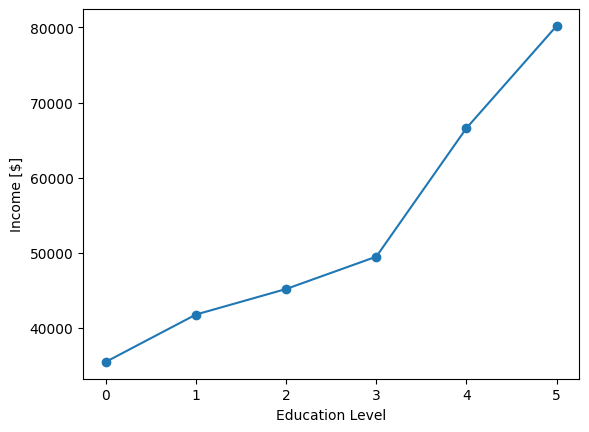

In [8]:
# After extract the second column
# Had to remove the first one 54200 because it is for all levels.
# Income_arr = np.array([54200.,35500.,41800.,45200.,49500.,66600.,80200.])
Income_arr = np.array([35500.,41800.,45200.,49500.,66600.,80200.])
Education_arr = np.arange(len(Income_arr))
plt.plot(Education_arr,Income_arr, "o-")
plt.xlabel("Education Level")
plt.ylabel("Income [$]")
plt.show()

In [12]:
# Extract the first column and remove the first one entry.
Education_levels = np.array([
"Less than high school completion",
"High school completion",
"Some college, no degree",
"Associate’s degree",
"Bachelor’s degree",
"Master’s or higher degree"
])

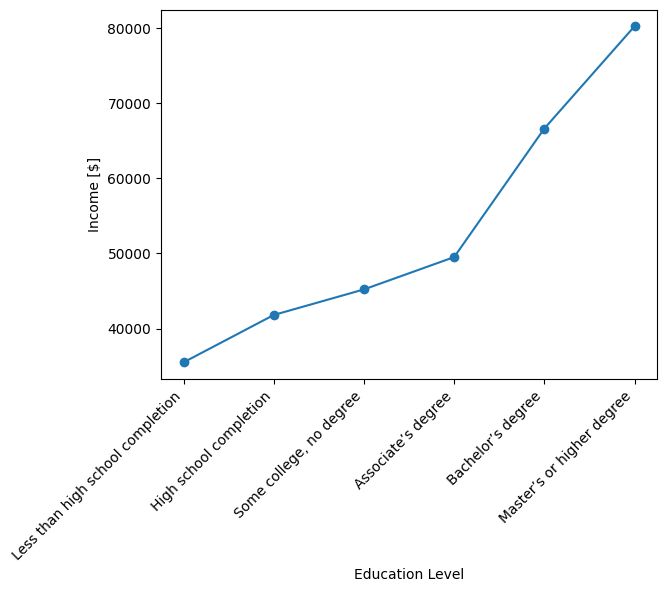

In [14]:
# To make the figure more readable on the axis
plt.plot(Education_arr,Income_arr, "o-")
plt.xlabel("Education Level")
plt.ylabel("Income [$]")
plt.xticks(Education_arr, Education_levels, rotation=45, ha="right")
plt.show()

In [18]:
# Use polyfit to fit the data with a linear relathioship, i.e., a first-order polynomial
# More information about polyfit can be found here: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
z_linear = np.polyfit(Education_arr,Income_arr,1)
# "income = z_linear[0] * level + z_linear[1]", where z_linear[0] represents the slope and z_linear[1] represents the y-intercept
print("Slope = ", z_linear[0], " in dollar per level")
print("Y-intercept = ", z_linear[1], " in dollar at level 0, i.e., Less than high school completion")

Slope =  8634.28571428571  in dollar per level
Y-intercept =  31547.619047619028  in dollar at level 0, i.e., Less than high school completion


## How about fitting the data with second-order polynomial, i.e., a quadratic function?

In [23]:
z_quadratic = np.polyfit(Education_arr,Income_arr,2)
print(z_quadratic)
print("That is: Income = {:.1f} * level**2 + {:.1f} * level + {:.1f}".format(z_quadratic[0], z_quadratic[1], z_quadratic[2]))
# Note the above line on the usage of {} for printing variables, and :.1f to control the printed number of siginifiant digits

[ 1630.35714286   482.5        36982.14285714]
That is: Income = 1630.4 * level**2 + 482.5 * level + 36982.1


## Now which fit is better? Introducing $\chi^2$
## $\chi^2 = \Sigma\frac{(O_i - C_i)^2}{\sigma_i^2}$
## And reduced chi-squared statistic $\chi^2_\nu = \frac{\chi^2}{\nu}$, where O is observation, C is calculation, $\sigma$ is measurement error, and $\nu$ is the degree of freedom, which is n - m, where n is the number of data points used in fitting and m is the number of fitting parameters. For linear fitting, m = 2 because the two fitting parameters are slope and y-intercept. For quadratic fitting, m = 3. See more details here: https://en.wikipedia.org/wiki/Reduced_chi-squared_statistic

## In general, we would like $\chi^2_\nu$ to be close to 1 but not too much bigger or smaller than 1.

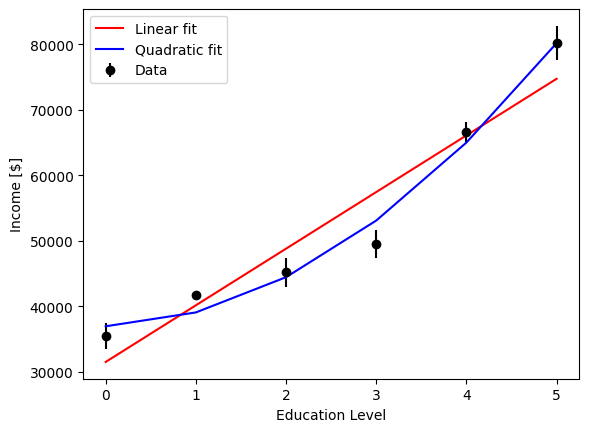

In [28]:
# Plot the data and the two fits: linear and quadratic
# Rename some variables to be consistent with the above definition
O = Income_arr
O_err = np.array([1910, 500, 2220, 2140, 1540, 2580]) # extract from the same figure with Confidence interval toggled on, and remove the first entry
C_linear = z_linear[0] * Education_arr + z_linear[1]
C_quadratic = z_quadratic[0] * Education_arr**2 + z_quadratic[1] * Education_arr + z_quadratic[2]

Income_arr = np.array([35500.,41800.,45200.,49500.,66600.,80200.])
Education_arr = np.arange(len(Income_arr))
plt.errorbar(Education_arr, O, yerr=O_err, marker="o", linestyle = "None", color = "black", label = "Data")
plt.plot(Education_arr,C_linear, color = "red", label = "Linear fit")
plt.plot(Education_arr,C_quadratic, color = "blue", label = "Quadratic fit")
plt.legend()
plt.xlabel("Education Level")
plt.ylabel("Income [$]")
plt.show()

## Let's calculate reduced Chi2, i.e., $\chi^2_\nu$ , for the two fits

In [34]:
n = len(O)
m_linear = 2
m_quadratic = 3
re_chi2_linear = np.sum((O - C_linear)**2 / O_err**2) / (n - m_linear)
print("Reduced Chi2 for linear fit = {:.2f}".format(re_chi2_linear))
re_chi2_quadratic = np.sum((O - C_quadratic)**2 / O_err**2) / (n - m_quadratic)
print("Reduced Chi2 for quadratic fit = {:.2f}".format(re_chi2_quadratic))

Reduced Chi2 for linear fit = 8.96
Reduced Chi2 for quadratic fit = 11.30


In [39]:
print((O - C_linear)**2 / O_err**2)

[ 4.28204139 10.4729288   2.65336287 13.80253115  0.11193721  4.51307599]


In [41]:
print((O - C_quadratic)**2 / O_err**2)
np.set_printoptions(suppress=True)
print((O - C_quadratic)**2 / O_err**2)


[6.02162070e-01 2.92681000e+01 1.08552016e-01 2.83443523e+00
 1.08233333e+00 3.23840551e-04]
[ 0.60216207 29.2681      0.10855202  2.83443523  1.08233333  0.00032384]
